In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
def show_images(dataloader):
    inputs, labels = next(iter(dataloader))
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        img = inputs[i]
        ax.imshow(img)
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis("off")
    plt.show()

dict_keys(['train_0.005', 'train_0.01', 'train_0.02', 'train_0.05', 'train_0.10', 'train_0.20', 'test'])


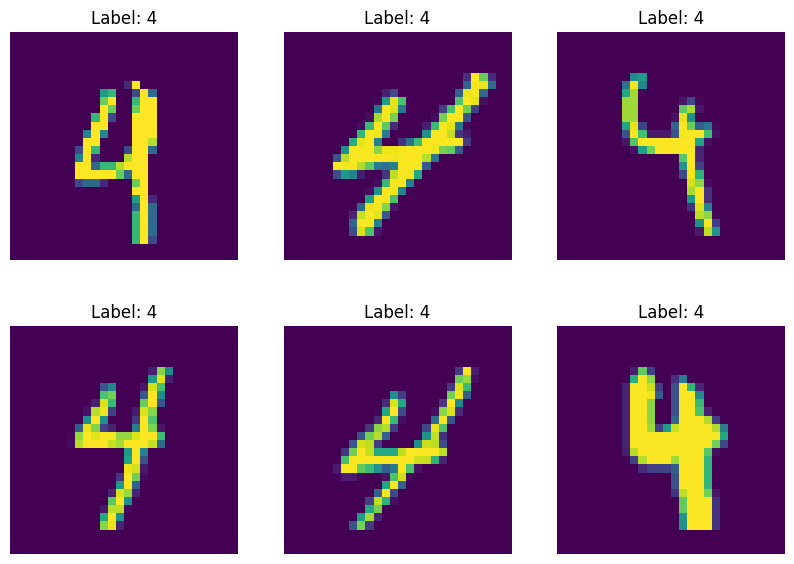

In [6]:
import pickle
file_name = "/Users/max/MasterThesisData/Binary_MNIST_data_loaders.pkl"
with open(file_name, "rb") as f:
    Binary_MNIST = pickle.load(f)

print(Binary_MNIST.keys())
train_data_0005 = Binary_MNIST["train_0.005"]
show_images(train_data_0005)

In [7]:
import torch
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
import random
random.seed(42)
from sklearn import svm
from sklearn.preprocessing import StandardScaler
train_data_0005 = Binary_MNIST["train_0.005"]
train_data_001 = Binary_MNIST["train_0.01"]
train_data_002 = Binary_MNIST["train_0.02"]
train_data_005 = Binary_MNIST["train_0.05"]
train_data_010 = Binary_MNIST["train_0.10"]
train_data_020 = Binary_MNIST["train_0.20"]
test_data = Binary_MNIST["test"]

### 0.5\%

In [ ]:
Train_DataLoader = train_data_0005 # 0.005 0.5%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.005")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# labels = np.unique(y_train)
# print("Labels:", labels)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)


import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.005
3 is negative, 4 is positive
Train_label1: 29
Train_label7: 5842
Test_label1: 1010
Test_label7: 982
X_train.shape: (5871, 784)
y_train.shape: (5871,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 982
FP: 120
FN: 0
TN: 890
Accuracy: 0.9398
Misclassification rate: 0.0602
Sensitivity (Recall): 1.0000
Specificity: 0.8812
Precision: 0.8911
Negative Predictive Value: 1.0000
G-mean: 0.9387
F-measure: 0.9424
Discriminant Power: Infinity
F2-measure: 0.9109
InvF0.5-measure: 0.9761
AGF: 0.9430
Balanced Accuracy: 0.9406
Matthew's Correlation Coefficient: 0.8861
Cohen's Kappa: 0.8797
Youden's Index: 0.8812
Positive Likelihood Ratio: 8.4167
Negative Likelihood Ratio: 0.0000
None


### 1%

In [10]:
Train_DataLoader = train_data_001 # 0.01 1%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.01")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.01
3 is negative, 4 is positive
Train_label3: 58
Train_label4: 5842
Test_label3: 1010
Test_label4: 982
X_train.shape: (5900, 784)
y_train.shape: (5900,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 981
FP: 82
FN: 1
TN: 928
Accuracy: 0.9583
Misclassification rate: 0.0417
Sensitivity (Recall): 0.9990
Specificity: 0.9188
Precision: 0.9229
Negative Predictive Value: 0.9989
G-mean: 0.9581
F-measure: 0.9594
Discriminant Power: 5.1356
F2-measure: 0.9371
InvF0.5-measure: 0.9828
AGF: 0.9597
Balanced Accuracy: 0.9589
Matthew's Correlation Coefficient: 0.9198
Cohen's Kappa: 0.9167
Youden's Index: 0.9178
Positive Likelihood Ratio: 12.3045
Negative Likelihood Ratio: 0.0011
None


### 2%

In [11]:
Train_DataLoader = train_data_002 # 0.02 2%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.02")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.02
3 is negative, 4 is positive
Train_label3: 116
Train_label4: 5842
Test_label3: 1010
Test_label4: 982
X_train.shape: (5958, 784)
y_train.shape: (5958,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 982
FP: 52
FN: 0
TN: 958
Accuracy: 0.9739
Misclassification rate: 0.0261
Sensitivity (Recall): 1.0000
Specificity: 0.9485
Precision: 0.9497
Negative Predictive Value: 1.0000
G-mean: 0.9739
F-measure: 0.9742
Discriminant Power: Infinity
F2-measure: 0.9594
InvF0.5-measure: 0.9895
AGF: 0.9743
Balanced Accuracy: 0.9743
Matthew's Correlation Coefficient: 0.9491
Cohen's Kappa: 0.9478
Youden's Index: 0.9485
Positive Likelihood Ratio: 19.4231
Negative Likelihood Ratio: 0.0000
None


### 5%

In [12]:
Train_DataLoader = train_data_005 # 0.05 5%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.05")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.05
3 is negative, 4 is positive
Train_label3: 292
Train_label4: 5842
Test_label3: 1010
Test_label4: 982
X_train.shape: (6134, 784)
y_train.shape: (6134,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 982
FP: 31
FN: 0
TN: 979
Accuracy: 0.9844
Misclassification rate: 0.0156
Sensitivity (Recall): 1.0000
Specificity: 0.9693
Precision: 0.9694
Negative Predictive Value: 1.0000
G-mean: 0.9845
F-measure: 0.9845
Discriminant Power: Infinity
F2-measure: 0.9754
InvF0.5-measure: 0.9937
AGF: 0.9845
Balanced Accuracy: 0.9847
Matthew's Correlation Coefficient: 0.9694
Cohen's Kappa: 0.9689
Youden's Index: 0.9693
Positive Likelihood Ratio: 32.5806
Negative Likelihood Ratio: 0.0000
None


### 10%

In [13]:
Train_DataLoader = train_data_010 # 0.1 10%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.10")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.10
3 is negative, 4 is positive
Train_label3: 584
Train_label4: 5842
Test_label3: 1010
Test_label4: 982
X_train.shape: (6426, 784)
y_train.shape: (6426,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 980
FP: 23
FN: 2
TN: 987
Accuracy: 0.9874
Misclassification rate: 0.0126
Sensitivity (Recall): 0.9980
Specificity: 0.9772
Precision: 0.9771
Negative Predictive Value: 0.9980
G-mean: 0.9875
F-measure: 0.9874
Discriminant Power: 5.4877
F2-measure: 0.9812
InvF0.5-measure: 0.9937
AGF: 0.9874
Balanced Accuracy: 0.9876
Matthew's Correlation Coefficient: 0.9751
Cohen's Kappa: 0.9749
Youden's Index: 0.9752
Positive Likelihood Ratio: 43.8236
Negative Likelihood Ratio: 0.0021
None


### 20%

In [14]:
Train_DataLoader = train_data_020 # 0.2 20%
Test_DataLoader = test_data
print("Dataset: Binary_MNIST")
print("Imbalanced Ratio: 0.20")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_MNIST
Imbalanced Ratio: 0.20
3 is negative, 4 is positive
Train_label3: 1168
Train_label4: 5842
Test_label3: 1010
Test_label4: 982
X_train.shape: (7010, 784)
y_train.shape: (7010,)
X_test.shape: (1992, 784)
y_test.shape: (1992,)
y_pred.shape: (1992,)
TP: 982
FP: 15
FN: 0
TN: 995
Accuracy: 0.9925
Misclassification rate: 0.0075
Sensitivity (Recall): 1.0000
Specificity: 0.9851
Precision: 0.9850
Negative Predictive Value: 1.0000
G-mean: 0.9925
F-measure: 0.9924
Discriminant Power: Infinity
F2-measure: 0.9879
InvF0.5-measure: 0.9970
AGF: 0.9924
Balanced Accuracy: 0.9926
Matthew's Correlation Coefficient: 0.9851
Cohen's Kappa: 0.9849
Youden's Index: 0.9851
Positive Likelihood Ratio: 67.3333
Negative Likelihood Ratio: 0.0000
None
